In [4]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

***

In [5]:
path = '../data/tweetscov19_political_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetscov19_political_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])

print('Shape :', df_tweetscov19_political_polarized_and_neutralized.shape)
df_tweetscov19_political_polarized_and_neutralized.head()

Shape : (176301, 5)


,Username,Number_of_liberals,Number_of_conservatives,Sum_polarised_domains,politic
0,00008ca06f863b962f72cc9167d7978a,-1,0,1,-1.0000
1,00008de3f61d5f04329ee6867d5475b9,-1,0,1,-1.0000
2,00012a177385cd6e7590e2acb3f206e3,-1,0,1,-1.0000
3,00016e20a3865cb74581803c27d27b89,-1,0,1,-1.0000
4,000186b796b0eb667801aad27ca978eb,-2,0,2,-1.0000


In [6]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [7]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetscov19_political_polarized_and_neutralized = df_tweetscov19_political_polarized_and_neutralized[['Username', 'politic']]

df_tweetscov19 = pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_political_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (2057978, 4)


,Username,is_deleted,Reputation,politic
0,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-0.5000
1,7966d5716c1c4f33591b17755184e3d6,True,0.5722,-0.5000
2,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-0.5000
3,7966d5716c1c4f33591b17755184e3d6,False,0.5722,-0.5000
4,7966d5716c1c4f33591b17755184e3d6,True,0.5722,-0.5000


****

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

Alle Users: 176301


In [8]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['politic'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (1973156, 3)


,Username,is_deleted,politic
0,7966d5716c1c4f33591b17755184e3d6,False,-0.5000
1,7966d5716c1c4f33591b17755184e3d6,True,-0.5000
2,7966d5716c1c4f33591b17755184e3d6,False,-0.5000
3,7966d5716c1c4f33591b17755184e3d6,False,-0.5000
4,7966d5716c1c4f33591b17755184e3d6,True,-0.5000


In [5]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [6]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)


Deleted Tweets: (370830, 4)
Non-deleted Tweets: (1687148, 4)


In [11]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 171353
Alle kon. Users in gesammten Tweets: 36179
Alle lib. Users in gesammten Tweets: 135174


In [101]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 38986
Alle kon. Users in gelöschten Tweets: 10989
Alle lib. Users in gelöschten Tweets: 27997


In [102]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 147054
Alle kon. Users in nicht gelöschten Tweets: 28368
Alle lib. Users in nicht gelöschten Tweets: 118686


In [103]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


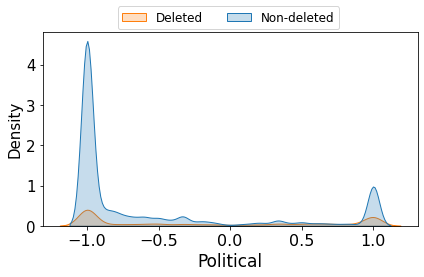

In [104]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_conditionaldistribution')

In [7]:

def plot_kdeplot_v2(df, hue, x, x_label, titel, name):
    #sns.color_palette("RdPu", 10)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    ax.set_title('Political', fontsize=22)
    ax.set_ylabel(ylabel='Density', fontsize=22)
    ax.set_xlabel(xlabel=x_label, fontsize=22)

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('../plots/'+name+'.pdf')
    

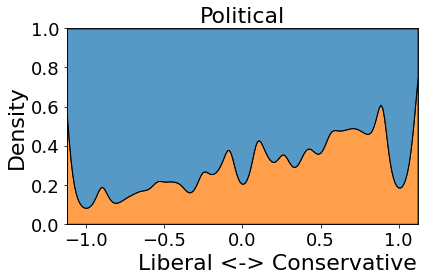

In [8]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'          Liberal <-> Conservative' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_Normalizethestackeddistribution')

In [107]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


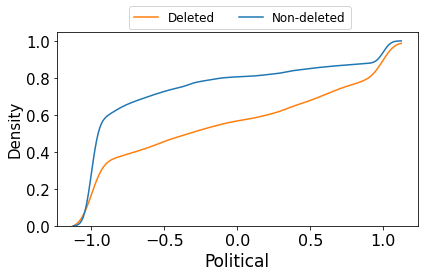

In [108]:
df = df_tweetscov19[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

***

In [29]:
class MathTextSciFormatter(ticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)
    
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram(df, titel):
    
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('b')
    patches[2].set_label('Liberal')
    
    
    for i in range(6,len(patches)):
        patches[i].set_facecolor('r')
    patches[9].set_label('Conservative')

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Political', fontsize=22)
    ax.set_ylabel('Number of users', fontsize=22)
    ax.set_xlabel(xlabel='          Liberal <-> Conservative' , fontsize=22)
    #ax.set_yscale("log")
    ax.yaxis.set_major_formatter(thousands)
    #ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))
    
    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))

    
    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

In [30]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

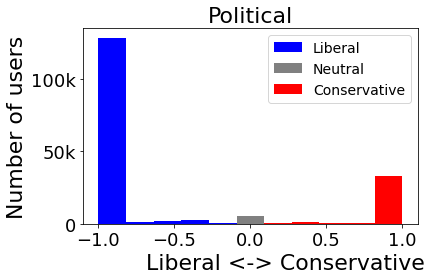

In [31]:
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(alltweets)')

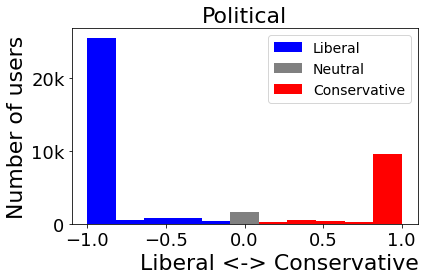

In [32]:
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(deletedtweets)')

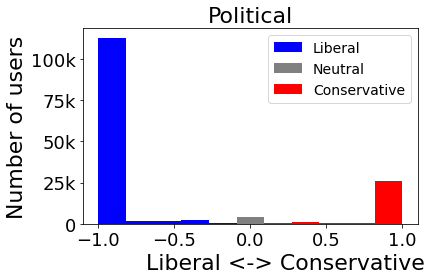

In [33]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['politic'],'hist_tweetsCov19_political_polarized_users(nondeletedtweets)')

----

***

# Heatmap
## Reputation-Polarisierung

***

***

In [37]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

def density_hp(df, title, x, y, color):
    fig = px.density_heatmap(df, x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale=color)
    fig.layout.height = 500
    fig.layout.width = 600
    fig.update_layout(
        title= dict(
            text= "Political",
            y=0.95,
            x=0.45,
            xanchor= 'center',
            yanchor= 'top'),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
        xaxis = dict(
            title='Liberal  <->  Conservative',
            
            tickmode = 'linear',
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        yaxis = dict(
            tickmode = 'linear',
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size =28,
            color = 'black'
              ),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        coloraxis_colorbar=dict(
            title="Tweets",
            thicknessmode="pixels",
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 25,
            color = 'black'
              ),
            ),


        )

    #fig.show()
    pyo.plot(fig, filename=title+".html")
    fig.write_image('../plots/heatmaps/'+title+'.pdf')

In [38]:
df = df_tweetscov19[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [39]:
density_hp(df,'density_hp_political_polarisation_tweetscov19_alltweets' ,'politic', 'Reputation', 'Blues')

In [40]:
density_hp(df_del,'density_hp_political_polarisation_tweetscov19_deleted' ,'politic', 'Reputation', 'Blues')

In [41]:
density_hp(df_undel,'density_hp_political_polarisation_tweetscov19_nondeleted' ,'politic', 'Reputation', 'Blues')

***

***

# TweetKB
## KDE-Plot

***

In [5]:
path = '../data/tweetskb_political_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetskb_political_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])

print('Shape :', df_tweetskb_political_polarized_and_neutralized.shape)
df_tweetskb_political_polarized_and_neutralized.head()

Shape : (67511, 5)


,Username,Number_of_liberals,Number_of_conservatives,Sum_polarised_domains,politic
0,0000Condor,-1,0,1,-1.0000
1,007AliSohrab,-1,1,2,0.0000
2,007newsandviews,-1,0,1,-1.0000
3,007plus100,-1,0,1,-1.0000
4,00CelebNewz00,-1,0,1,-1.0000


In [6]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [7]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]
df_tweetskb_political_polarized_and_neutralized = df_tweetskb_political_polarized_and_neutralized[['Username', 'politic']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_political_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (501063, 4)


,Username,is_deleted,Reputation,politic
0,DCComics,False,0.9998,-1.0000
1,DCComics,False,0.9998,-1.0000
2,DCComics,False,0.9998,-1.0000
3,DCComics,False,0.9998,-1.0000
4,DCComics,False,0.9998,-1.0000


***

In [68]:
print('Alle Users:', df_tweetskb.Username.unique().size)


Alle Users: 78638


In [69]:
df_tweetskb = df_tweetskb[df_tweetskb['politic'] != 0]

print('Shape: ', df_tweetskb.shape)
df_tweetskb.head()

Shape:  (478718, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [10]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [11]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)


Deleted Tweets: (107339, 4)
Non-deleted Tweets: (393724, 4)


In [18]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 66027
Alle kon. Users in gesammten Tweets: 14967
Alle lib. Users in gesammten Tweets: 51060


In [19]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 14796
Alle kon. Users in gelöschten Tweets: 4405
Alle lib. Users in gelöschten Tweets: 10391


In [20]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 55227
Alle kon. Users in nicht gelöschten Tweets: 11426
Alle lib. Users in nicht gelöschten Tweets: 43801


In [9]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_conditionaldistribution')

NameError: name 'plot_kdeplot_v1' is not defined

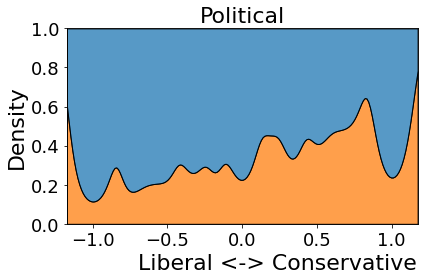

In [17]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'          Liberal <-> Conservative' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_Normalizethestackeddistribution')

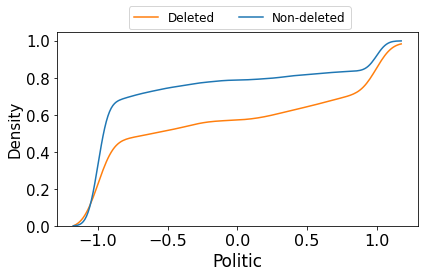

In [101]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_cumulativedistributionfunction')

# Histogram

***

***

In [34]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram_kb(df, titel):
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    #labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('royalblue')
    patches[1].set_label('Liberal')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('crimson')
    patches[9].set_label('Conservative')
    
          
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Political', fontsize=22)
    ax.set_ylabel('Number of users', fontsize=22)
    ax.set_xlabel(xlabel='          Liberal <-> Conservative' , fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [35]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

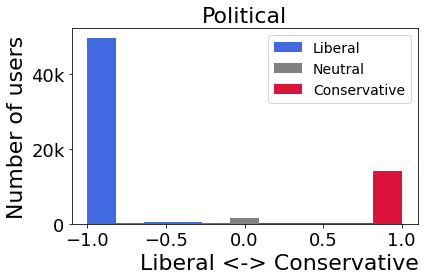

In [36]:
#All Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(alltweets)')

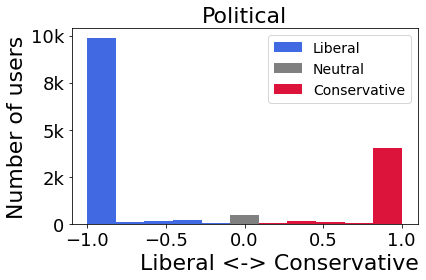

In [37]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(deletedtweets)')

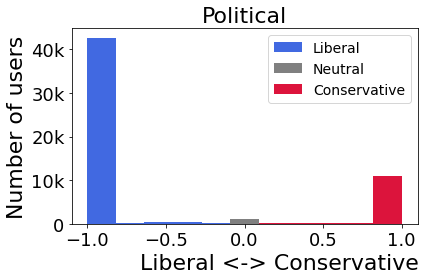

In [38]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

In [42]:
df = df_tweetskb[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [43]:
density_hp(df,'density_hp_political_polarisation_tweetskb_alltweets' ,'politic', 'Reputation', 'Blues')

In [44]:
density_hp(df_del,'density_hp_political_polarisation_tweetskb_deleted' ,'politic', 'Reputation', 'Blues')

In [45]:
density_hp(df_undel,'density_hp_political_polarisation_tweetskb_nondeleted' ,'politic', 'Reputation', 'Blues')